In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import dis

def get_literal_returns(func):
    rtn = []
    for instr in dis.Bytecode(func):
        if instr.opname == "RETURN_CONST":
            rtn.append(instr.argval)
        elif instr.opname == "RETURN_VALUE":
            rtn.append(instr.argrepr)

    return rtn

def example(a=True):
    if a == 2:
        return a

    if a:
        return 42
    else:
        return "hello"

get_literal_returns(example)  # Returns ['', 42, 'hello'], but I want it to return ['a', 42, 'hello']


['', 42, 'hello']

In [3]:
import dis

def get_literal_returns(func):
    rtn = []
    stack = []  # Tracks last loaded values

    for instr in dis.Bytecode(func):
        if instr.opname in {"LOAD_FAST", "LOAD_GLOBAL"}:  # Variable names
            stack.append(instr.argval)
        elif instr.opname == "LOAD_CONST":  # Literals
            stack.append(instr.argval)
        elif instr.opname == "RETURN_VALUE":
            if stack:  # Use last loaded value (var name or literal)
                rtn.append(stack[-1])
        elif instr.opname == "RETURN_CONST":
            rtn.append(instr.argval)

    return rtn

def example(a=True):
    if a == 2:
        return a  # Should capture 'a'

    if a:
        return 42  # Should capture 42
    else:
        return "hello"  # Should capture "hello"

get_literal_returns(example)  # Output: ['a', 42, 'hello']
# get_literal_returns(lambda: 8)  # Output: ['a', 42, 'hello']
get_literal_returns(lambda: 8)  # Output: ['a', 42, 'hello']


[8]

In [4]:
# print(dis.Bytecode(TestGraph().do_the_thing).dis())
from step_algorithm_v2 import StepsController


for i in list(dis.Bytecode(StepsController().screwdriver__labels)):
    print(i)
# print(dis.Bytecode(function).info())

Instruction(opname='RESUME', opcode=151, arg=0, argval=0, argrepr='', offset=0, starts_line=126, is_jump_target=False, positions=Positions(lineno=126, end_lineno=126, col_offset=0, end_col_offset=0))
Instruction(opname='LOAD_GLOBAL', opcode=116, arg=0, argval='case', argrepr='case', offset=2, starts_line=128, is_jump_target=False, positions=Positions(lineno=128, end_lineno=128, col_offset=11, end_col_offset=15))
Instruction(opname='LOAD_ATTR', opcode=106, arg=2, argval='serial', argrepr='serial', offset=12, starts_line=None, is_jump_target=False, positions=Positions(lineno=128, end_lineno=128, col_offset=11, end_col_offset=22))
Instruction(opname='LOAD_ATTR', opcode=106, arg=5, argval='startswith', argrepr='NULL|self + startswith', offset=32, starts_line=None, is_jump_target=False, positions=Positions(lineno=128, end_lineno=128, col_offset=11, end_col_offset=33))
Instruction(opname='LOAD_CONST', opcode=100, arg=1, argval='m6', argrepr="'m6'", offset=52, starts_line=None, is_jump_target

In [5]:
StepsController.get_returns(StepsController().confirm_ids)

['confirm_id', 'screwdriver__labels']

In [6]:
from GraphController import TestGraph

Before a
Before b
Deciding...
	self= <GraphController.TestGraph object at 0x7fab84550380>
	decider= False
decided on c
Before c
Before a
Before b
Deciding...
	self= <GraphController.TestGraph object at 0x7fab84550380>
	decider= True
decided on a
Before a
Before b
Deciding...
	self= <GraphController.TestGraph object at 0x7fab84550380>
	decider= True
decided on a
Before a


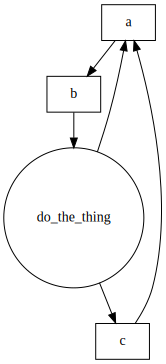

In [7]:
g = TestGraph()
g.next()
g.next(False)
g.next(False)
next(g)
next(g)
next(g)
next(g)
g.construct_graphvis()

In [70]:
from GraphController import ExampleMachine
m = ExampleMachine()
# Starting...
m.next()      # a -> b
m.next(False) # b -> c
m.next(False) # c -> a
next(m)       # a -> b
m.next(True)  # b -> a
next(m)       # a -> b
m.next(False) # b -> c
m.next(True)  # c -> None
# Finished!


Starting...
Now in state a... done
Now in state b... Deciding...
Decided on c
done
Now in state pre_c, but not for long... done
Now in state c... done
Deciding if done...
Decided we're not done
Now in state a... done
Now in state b... Deciding...
Decided on a
done
Now in state a... done
Now in state b... Deciding...
Decided on c
done
Now in state pre_c, but not for long... done
Now in state c... done
Deciding if done...
Decided we're done
Finished!


Starting...
Now in state a... [('a', 'if decider is True'), ('pre_c', '')]
[(None, 'Im done talking to you now.'), ('a', 'no keep going!')]


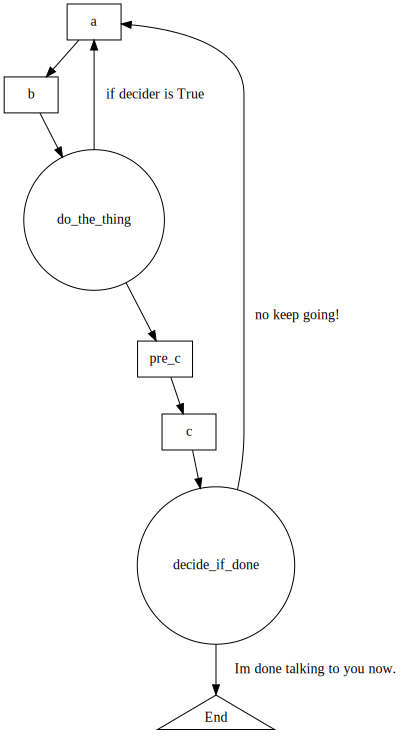

In [100]:
ExampleMachine().construct_graphvis()

In [ ]:
import ast, dis

code = """
def test(a):
    return a
"""
code2 = """
def test(a):
    ''' comment! '''
    return a
"""

def test(a):
    return a

def test2(a):
    return a
    """ comment! """


a = dis.Bytecode(test)
b = dis.Bytecode(test2)

print(a.dis())
print('---'*30)
print(b.dis())
a == b

 13           0 RESUME                   0

 14           2 LOAD_FAST                0 (a)
              4 RETURN_VALUE

------------------------------------------------------------------------------------------
 16           0 RESUME                   0

 17           2 LOAD_FAST                0 (a)
              4 RETURN_VALUE



False

In [46]:
import ast, dis

code = """
def test(a):
    return a
"""
code2 = """
def test(a):
    ''' comment! '''
    return a
"""

def test(a):
    return a

def test2(a):
    return a
    """ comment! """

a = ast.parse(code)
b = ast.parse(code2)

print(ast.dump(a, indent=4))
print('-'*60)
print(ast.dump(b, indent=4))

Module(
    body=[
        FunctionDef(
            name='test',
            args=arguments(
                posonlyargs=[],
                args=[
                    arg(arg='a')],
                kwonlyargs=[],
                kw_defaults=[],
                defaults=[]),
            body=[
                Return(
                    value=Name(id='a', ctx=Load()))],
            decorator_list=[],
            type_params=[])],
    type_ignores=[])
------------------------------------------------------------
Module(
    body=[
        FunctionDef(
            name='test',
            args=arguments(
                posonlyargs=[],
                args=[
                    arg(arg='a')],
                kwonlyargs=[],
                kw_defaults=[],
                defaults=[]),
            body=[
                Expr(
                    value=Constant(value=' comment! ')),
                Return(
                    value=Name(id='a', ctx=Load()))],
            decorator_list=[],
 

In [ ]:
import ast
import inspect

class ReturnVisitor(ast.NodeVisitor):
    def __init__(self):
        self.returns = []

    def visit_Return(self, node):
        """Handles return statements in regular functions."""
        self.returns.append(self.extract_value(node.value))

    def visit_Lambda(self, node):
        """Handles implicit return values in lambdas."""
        self.returns.append(self.extract_value(node.body))

    def extract_value(self, node):
        """Extracts literals or variable names from AST nodes."""
        if isinstance(node, ast.Constant):  # Literal values (numbers, strings, etc.)
            return node.value
        elif isinstance(node, ast.Name):  # Variables
            return node.id
        elif isinstance(node, ast.Call):  # Function calls (not handled)
            return f"<call to {node.func.id}>"
        return "<unknown>"

def get_literal_returns(func):
    source = inspect.getsource(func)
    tree = ast.parse(source)
    visitor = ReturnVisitor()
    visitor.visit(tree)
    return visitor.returns

# Example with a regular function
def example(a=True):
    if a == 2:
        return a
    if a:
        return 42
    else:
        return "hello"

# Example with a lambda
def lambda_example():
    other = 99
    return lambda: other

print(get_literal_returns(example))        # Output: ['a', 42, 'hello']
# print(get_literal_returns(lambda_example()))  # Output: ['other']


['a', 42, 'hello']


IndentationError: unexpected indent (<unknown>, line 1)

In [58]:
import ast
import inspect

def get_returns_ast(func):
    class ReturnVisitor(ast.NodeVisitor):
        def __init__(self):
            self.returns = {}

        def visit_FunctionDef(self, node):
            """Handles both function definitions and lambdas."""
            self.generic_visit(node)  # Process child nodes

        def visit_Lambda(self, node):
            """Handles lambda functions."""
            return_value = self.extract_value(node.body)
            self.returns[return_value] = None  # Lambdas don't have doc-like comments after return

        def visit_Return(self, node):
            """Handles return statements and collects potential trailing string literals."""
            return_value = self.extract_value(node.value)
            trailing_string = self.get_trailing_string(node)
            self.returns[return_value] = trailing_string

        def extract_value(self, node):
            """Extracts literals or variable names from AST nodes."""
            if isinstance(node, ast.Constant):  # Literal values (numbers, strings, etc.)
                return node.value
            elif isinstance(node, ast.Name):  # Variables
                return node.id
            return "<unknown>"

        def get_trailing_string(self, node):
            """Finds a string literal immediately following a return statement."""
            parent = node.parent
            if parent:
                body = parent.body
                try:
                    node_index = body.index(node)
                except ValueError:
                    body = parent.orelse
                    try:
                        node_index = body.index(node)
                    except ValueError:
                        print('Comment in unhandled place')
                        return
                if node_index + 1 < len(body):
                    next_node = body[node_index + 1]
                    if isinstance(next_node, ast.Expr) and isinstance(next_node.value, ast.Constant):
                        if isinstance(next_node.value.value, str):  # Must be a string
                            return next_node.value.value
            return None

    source = inspect.getsource(func)
    tree = ast.parse(source)

    # Set parent references for easy access
    for node in ast.walk(tree):
        for child in ast.iter_child_nodes(node):
            child.parent = node

    visitor = ReturnVisitor()
    visitor.visit(tree)
    return visitor.returns

# Example function with return statements followed by strings
def example(a=True):
    if a == 2:
        return a
        'this is a variable'
    elif a:
        return 42
        'this is a literal'
    else:
        return "hello"
        'this is a string'

print(get_literal_returns(example))
# Expected Output:
# {'a': 'this is a variable', 42: 'this is a literal', 'hello': 'this is a string'}


{'a': 'this is a variable', 42: 'this is a literal', 'hello': 'this is a string'}


[('confirm_id', ''), ('screwdriver__labels', '')]
[('ask_labels', ''), ('turn_down_screwdriver', '')]
[('ask_came_with_bag', 'if theres a dock'), ('ask_pad', 'if no dock')]
[('ask_came_with_pad', 'if combo'), ('customer_states', 'otherwise')]
[('ask_came_with_pad', 'if combo'), ('customer_states', 'otherwise')]


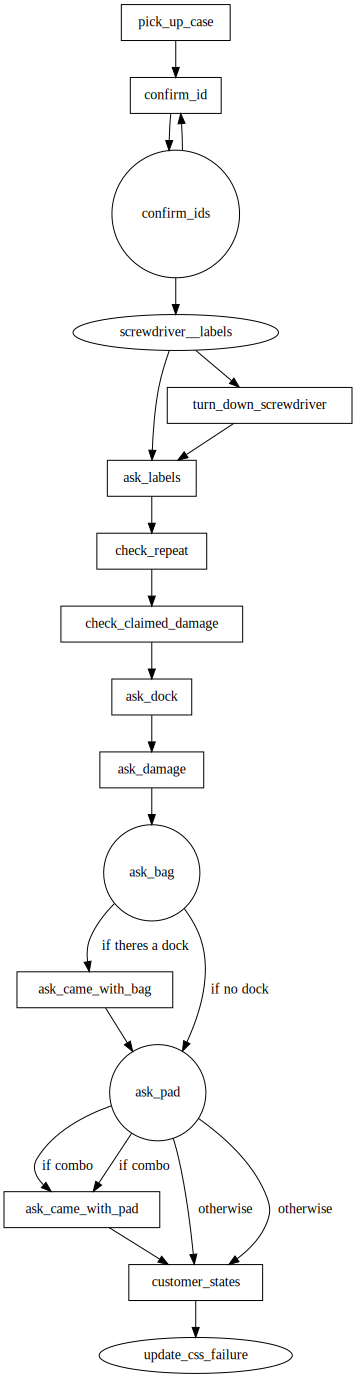

In [101]:
from step_algorithm_v2 import StepsController
StepsController().construct_graphvis(True, _backend='dis')